# GRIP : Task 2


### Problem Statement: Predicting percentage score of a student based on no. of hours of study

#### In this notebook we will be training different supervised learning models and chose one which has the best validation accuracy


### Import all relevant libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


### Reading data and displaying it

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#printing first 5 rows
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking for any missing values 

In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing the relationship between hours and scores

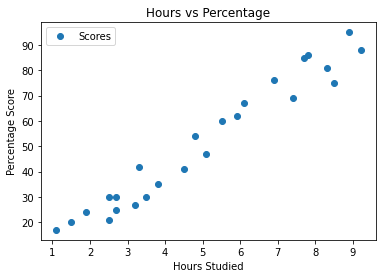

In [4]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above we can see there is a positive relation between hours studied and scores


### Slicing the data set into feature X and label Y

In [5]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

print('X_arr shape: ', X.shape)
print('Y_arr shape: ', Y.shape)

X_arr shape:  (25, 1)
Y_arr shape:  (25,)


### Splitting the data set (80% training set and 20% validation set )

In [6]:

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (20, 1)
y_train shape:  (20,)
X_test shape:  (5, 1)
y_test shape:  (5,)


### Training Model 1 : Linear Regression

In [7]:
linModel = LinearRegression()  
linModel.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Visualizing how well the model fits the data

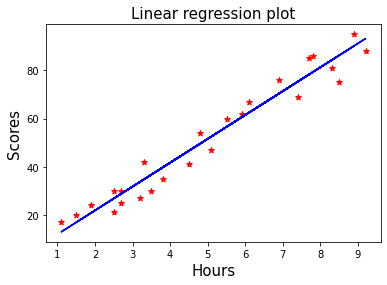

In [8]:
# Plotting the regression line
line = linModel.coef_*X +linModel.intercept_

# Plotting for the training data
plt.scatter(X, Y,color='red',marker='*')
plt.plot(X, line,color='blue')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Linear regression plot",fontsize=15)
plt.show()

### Comparing the actual y values with model predicted values

In [9]:
#comparing the validation set predictions with the actual values
linPrediction = linModel.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': linPrediction})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating model  

In [10]:
print('Training Accuracy:',(100*linModel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*linModel.score(X_val, y_val)).round(2),'%')
MAE1=mean_absolute_error(linPrediction,y_val)
RMSE1=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 1:',MAE1.round(2))
print('Root Mean Squared Error in Model 1:',RMSE1.round(2))

Training Accuracy: 95.16 %
Validation Accuracy 94.55 %
Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65


### Predicted vs Actual Value Bar Graph 

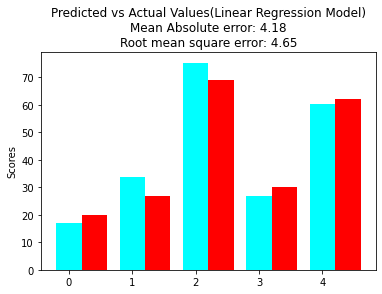

In [11]:
N=np.arange(5)
plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,linPrediction,width=0.4,label='Linear Regression',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Linear Regression Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE1.round(2),RMSE1.round(2)))
plt.show()

## What will be predicted score if a student studies for 9.25 hrs in a day?

In [12]:

print('Predicted Score: ',linModel.predict([[9.25]])[0])


Predicted Score:  93.69173248737538
